In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('psp_data.csv')

df = df[[' Year', 'Planting Year', 'Block', 'Plot Number', 'Tree Number', 'Height', 'DBH (cm)']]
df.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_5388\3901920858.py:1: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('psp_data.csv')


,Year,Planting Year,Block,Plot Number,Tree Number,Height,DBH (cm)
0,2021,2018,A52,865,1.0,6.5,6.3
1,2021,2018,A52,865,2.0,6.25,6.6
2,2021,2018,A52,865,3.0,2.75,3
3,2021,2018,A52,865,4.0,5.5,7.3
4,2021,2018,A52,865,5.0,4.25,5.3


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67797 entries, 0 to 67796
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Year          67797 non-null  int64  
 1   Planting Year  67797 non-null  object 
 2   Block          67797 non-null  object 
 3   Plot Number    67797 non-null  object 
 4   Tree Number    67797 non-null  float64
 5   Height         67797 non-null  object 
 6   DBH (cm)       67797 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [163]:
df.rename(columns={' Year': 'Monitoring year'})

,Monitoring year,Planting Year,Block,Plot Number,Tree Number,Height,DBH (cm)
0,2021,2018,A52,865,1.0,6.5,6.3
1,2021,2018,A52,865,2.0,6.25,6.6
2,2021,2018,A52,865,3.0,2.75,3
3,2021,2018,A52,865,4.0,5.5,7.3
4,2021,2018,A52,865,5.0,4.25,5.3
...,...,...,...,...,...,...,...
67792,2021,2013,B61,63,77.0,11.5,13
67793,2021,2013,B61,63,78.0,11.5,12.7
67794,2021,2013,B61,63,79.0,dead,dead
67795,2021,2013,B61,63,80.0,dead,dead


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67797 entries, 0 to 67796
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Year          67797 non-null  int64  
 1   Planting Year  67797 non-null  object 
 2   Block          67797 non-null  object 
 3   Plot Number    67797 non-null  object 
 4   Tree Number    67797 non-null  float64
 5   Height         67797 non-null  object 
 6   DBH (cm)       67797 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [165]:
df = df[~((df['Height'] == 'dead'))]

In [166]:
df.shape

(38852, 7)

In [167]:
df['Height'] = df['Height'].astype(float)

In [168]:
df['DBH (cm)'] = df['DBH (cm)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38852 entries, 0 to 67793
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Year          38852 non-null  int64  
 1   Planting Year  38852 non-null  object 
 2   Block          38852 non-null  object 
 3   Plot Number    38852 non-null  object 
 4   Tree Number    38852 non-null  float64
 5   Height         38852 non-null  float64
 6   DBH (cm)       38852 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.4+ MB


In [169]:
df['volume'] = 0.000039 * df['DBH (cm)']**2 * df['Height']

In [170]:
df.head()

,Year,Planting Year,Block,Plot Number,Tree Number,Height,DBH (cm),volume
0,2021,2018,A52,865,1.0,6.50,6.3,0.010061
1,2021,2018,A52,865,2.0,6.25,6.6,0.010618
2,2021,2018,A52,865,3.0,2.75,3.0,0.000965
3,2021,2018,A52,865,4.0,5.50,7.3,0.011431
4,2021,2018,A52,865,5.0,4.25,5.3,0.004656


In [171]:
df['basal_area_per_tree'] = (np.pi * df['DBH (cm)']**2)/(4 * 10000)

In [172]:
df.head()

,Year,Planting Year,Block,Plot Number,Tree Number,Height,DBH (cm),volume,basal_area_per_tree
0,2021,2018,A52,865,1.0,6.50,6.3,0.010061,0.003117
1,2021,2018,A52,865,2.0,6.25,6.6,0.010618,0.003421
2,2021,2018,A52,865,3.0,2.75,3.0,0.000965,0.000707
3,2021,2018,A52,865,4.0,5.50,7.3,0.011431,0.004185
4,2021,2018,A52,865,5.0,4.25,5.3,0.004656,0.002206


In [173]:
plot_ba_ha = df.groupby(['Block','Plot Number', 'Planting Year'])['basal_area_per_tree'].sum().reset_index(name='basal_area_plot')

In [174]:
plot_ba_ha.head()

,Block,Plot Number,Planting Year,basal_area_plot
0,A27,686,2017,0.244440
1,A27,687,2017,0.577993
2,A27,688,2017,0.437627
3,A27,689,2017,0.549078
4,A27,690,2017,0.709244


In [175]:
plot_ba_ha['basal_area_ha'] = plot_ba_ha['basal_area_plot'] / (729/10000)

In [176]:
plot_ba_ha.head()

,Block,Plot Number,Planting Year,basal_area_plot,basal_area_ha
0,A27,686,2017,0.244440,3.353090
1,A27,687,2017,0.577993,7.928568
2,A27,688,2017,0.437627,6.003114
3,A27,689,2017,0.549078,7.531936
4,A27,690,2017,0.709244,9.728993


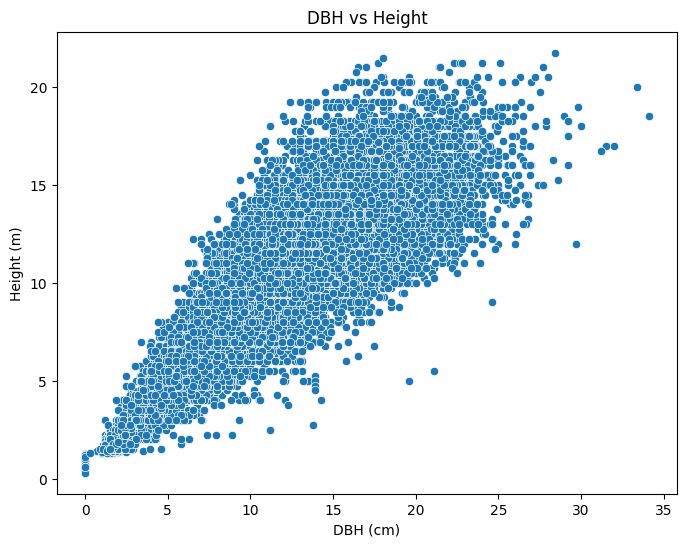

In [177]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DBH (cm)', y='Height')
plt.title('DBH vs Height')
plt.xlabel("DBH (cm)")
plt.ylabel("Height (m)")
plt.show()

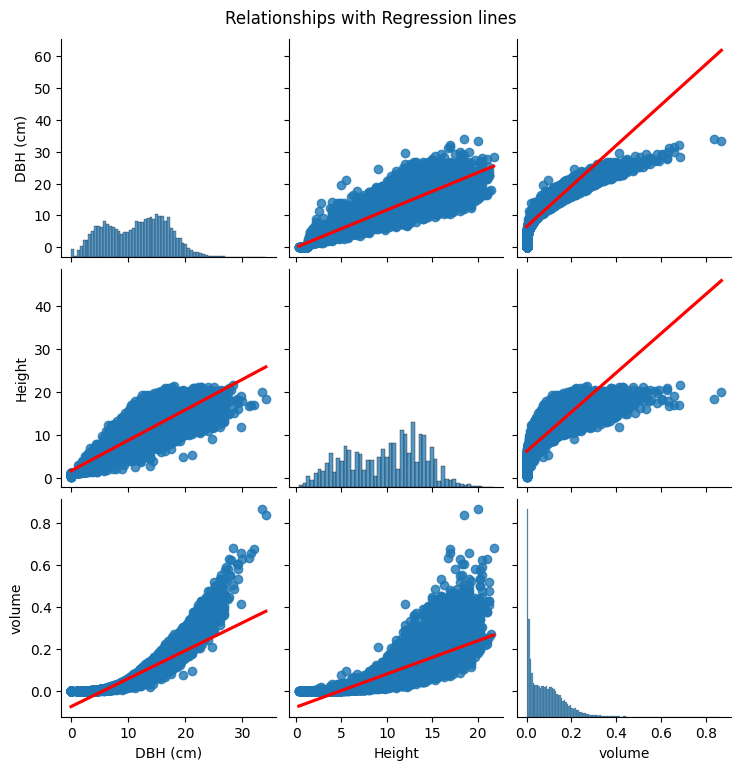

In [178]:
sns.pairplot(df[['DBH (cm)', 'Height', 'volume']], kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle("Relationships with Regression lines", y=1.02)
plt.show()

In [179]:
plot_ba_ha.head()

,Block,Plot Number,Planting Year,basal_area_plot,basal_area_ha
0,A27,686,2017,0.244440,3.353090
1,A27,687,2017,0.577993,7.928568
2,A27,688,2017,0.437627,6.003114
3,A27,689,2017,0.549078,7.531936
4,A27,690,2017,0.709244,9.728993


In [180]:
import pyodbc

db_file = r"C:\Users\GILBERT FG\Desktop\Readings\PSP_database.accdb"

conn = pyodbc.connect(
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={db_file};'
)

cursor = conn.cursor()

for table in cursor.tables(tableType='TABLE'):
    print(table.table_name)

Block register
Plot monitoring history
Plot-block relation
PSPs
Slope correction factors
Thinning history
TreeData


In [181]:
query = r"SELECT * FROM [Block register] WHERE Plantation = 'Tain II'"

blk_register = pd.read_sql(query, conn)
blk_register.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_5388\2938307333.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blk_register = pd.read_sql(query, conn)


,PLANTATION,BLOCK,STATUS,ROTATION,OWNERSHIP,RESERVE,YEAR PLANTED,BLOCK AREA (ha),PRODUCTIVE,UNPRODUCTIVE,TEAK,NATURAL INDIGENOUS,PLANTED INDIGENOUS,GMELINA,OPEN LAND,ROCK,REMARK
0,Tain II,A17,PLANTED,1,FORM GHANA,TAIN II,2023,61.957130,58.858151,NaN,58.858151,NaN,NaN,NaN,NaN,3.098979,None
1,Tain II,A19,PLANTED,1,FORM GHANA,TAIN II,2019,67.587663,64.984407,0.15,64.984407,NaN,NaN,NaN,0.0,2.453256,None
2,Tain II,A20,PLANTED,1,FORM GHANA,TAIN II,2019,70.331435,70.197867,0.00,70.197867,NaN,NaN,NaN,0.0,0.133569,None
3,Tain II,A21,PLANTED,1,FORM GHANA,TAIN II,2019,48.657170,47.743954,0.40,47.743954,NaN,NaN,NaN,0.0,0.513216,None
4,Tain II,A22,PLANTED,1,FORM GHANA,TAIN II,2019,50.624752,50.110498,0.00,50.110498,NaN,NaN,NaN,0.0,0.514254,None


In [182]:
blk_register = blk_register[['BLOCK', 'PRODUCTIVE']]

In [183]:
blk_register.head()

,BLOCK,PRODUCTIVE
0,A17,58.858151
1,A19,64.984407
2,A20,70.197867
3,A21,47.743954
4,A22,50.110498


In [184]:
blk_register = blk_register.rename(columns={'BLOCK': 'Block', 'PRODUCTIVE': 'Productive'})

In [185]:
blk_register.head()

,Block,Productive
0,A17,58.858151
1,A19,64.984407
2,A20,70.197867
3,A21,47.743954
4,A22,50.110498


In [186]:
plot_ba_ha = pd.merge(plot_ba_ha, blk_register, on='Block')

In [187]:
plot_ba_ha.head()

,Block,Plot Number,Planting Year,basal_area_plot,basal_area_ha,Productive
0,A27,686,2017,0.244440,3.353090,60.478599
1,A27,687,2017,0.577993,7.928568,60.478599
2,A27,688,2017,0.437627,6.003114,60.478599
3,A27,689,2017,0.549078,7.531936,60.478599
4,A27,690,2017,0.709244,9.728993,60.478599


In [188]:
plot_ba_ha = plot_ba_ha.rename(columns={'Productive': 'block size (ha)'})

In [189]:
plot_ba_ha

,Block,Plot Number,Planting Year,basal_area_plot,basal_area_ha,block size (ha)
0,A27,686,2017,0.244440,3.353090,60.478599
1,A27,687,2017,0.577993,7.928568,60.478599
2,A27,688,2017,0.437627,6.003114,60.478599
3,A27,689,2017,0.549078,7.531936,60.478599
4,A27,690,2017,0.709244,9.728993,60.478599
...,...,...,...,...,...,...
826,B9B,451,2018,0.588718,8.075692,36.327879
827,B9B,452,2018,0.596240,8.178871,36.327879
828,B9B,453,2018,0.224383,3.077953,36.327879
829,B9B,454,2018,1.082254,14.845730,36.327879


In [190]:
# Basal Area per block
plots_per_block = plot_ba_ha[['Block', 'Plot Number']].drop_duplicates().groupby('Block').count().rename(columns={'Plot Number': 'Number of plots'})

In [191]:
plots_per_block.head()

,Number of plots
Block,
A27,9
A28,7
A31,6
A32,10
A37,9


In [192]:
ba_per_block = plot_ba_ha.groupby('Block')['basal_area_ha'].sum().reset_index()

In [193]:
ba_per_block

,Block,basal_area_ha
0,A27,50.025812
1,A28,30.810157
2,A31,28.621094
3,A32,99.873291
4,A37,15.568283
...,...,...
100,B69,11.633977
101,B70,8.383172
102,B8,32.827130
103,B9A,41.597240


In [194]:
ba_per_block = ba_per_block.merge(plots_per_block, on='Block')

In [195]:
ba_per_block.head()

,Block,basal_area_ha,Number of plots
0,A27,50.025812,9
1,A28,30.810157,7
2,A31,28.621094,6
3,A32,99.873291,10
4,A37,15.568283,9


In [196]:
ba_per_block['Block_Area_ha'] = ba_per_block['Number of plots'] * (729/10000)

In [197]:
ba_per_block.head()

,Block,basal_area_ha,Number of plots,Block_Area_ha
0,A27,50.025812,9,0.6561
1,A28,30.810157,7,0.5103
2,A31,28.621094,6,0.4374
3,A32,99.873291,10,0.7290
4,A37,15.568283,9,0.6561


In [198]:
ba_per_block['Basal_Area_per_ha'] = ba_per_block['basal_area_ha'] / ba_per_block['Block_Area_ha']

In [199]:
ba_per_block.head()

,Block,basal_area_ha,Number of plots,Block_Area_ha,Basal_Area_per_ha
0,A27,50.025812,9,0.6561,76.247237
1,A28,30.810157,7,0.5103,60.376557
2,A31,28.621094,6,0.4374,65.434600
3,A32,99.873291,10,0.7290,137.000399
4,A37,15.568283,9,0.6561,23.728522
